In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('Uber.csv')

In [3]:
ndf = df

In [15]:
#STUDYING THE DATASET

In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
#PREPROCESSING THE DATASET

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [12]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         199999 non-null  int64              
 1   key                199999 non-null  object             
 2   fare_amount        199999 non-null  float64            
 3   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 4   pickup_longitude   199999 non-null  float64            
 5   pickup_latitude    199999 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [17]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

In [32]:
df.drop(['Unnamed: 0','key'],axis=1, inplace=True)

In [19]:
#outliers detection

In [20]:
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)
iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+1.5*iqr

In [21]:
df[(df['fare_amount']<lb) | (df['fare_amount']>ub)]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week
6,48725865,2014-10-12 07:04:00.0000002,24.50,2014-10-12 07:04:00+00:00,-73.961447,40.693965,-73.871195,40.774297,5,7,6
30,31945670,2011-05-21 09:00:00.00000031,25.70,2011-05-21 09:00:00+00:00,-73.944815,40.834367,-73.989332,40.721920,4,9,5
34,19277743,2014-06-04 06:49:00.000000102,39.50,2014-06-04 06:49:00+00:00,-73.788080,40.642187,-73.865042,40.725997,4,6,2
39,38703737,2014-02-13 17:57:00.000000102,29.00,2014-02-13 17:57:00+00:00,-73.992600,40.753172,-73.908508,40.816192,1,17,3
48,22405517,2013-01-03 22:24:41.0000002,56.80,2013-01-03 22:24:41+00:00,-73.993498,40.764686,-73.993498,40.764686,1,22,3
...,...,...,...,...,...,...,...,...,...,...,...
199976,1780041,2011-10-18 23:53:00.000000145,49.70,2011-10-18 23:53:00+00:00,-73.978225,40.783318,-73.700963,40.705852,1,23,1
199977,21117828,2012-11-20 21:04:30.0000001,43.50,2012-11-20 21:04:30+00:00,-73.996671,40.737483,-73.867758,40.897563,1,21,1
199982,13096190,2014-08-06 11:06:06.0000001,57.33,2014-08-06 11:06:06+00:00,-73.969204,40.754771,-73.790351,40.643802,1,11,2
199985,25830754,2015-04-18 15:16:06.0000005,24.00,2015-04-18 15:16:06+00:00,-74.005089,40.737301,-73.945290,40.774162,5,15,5


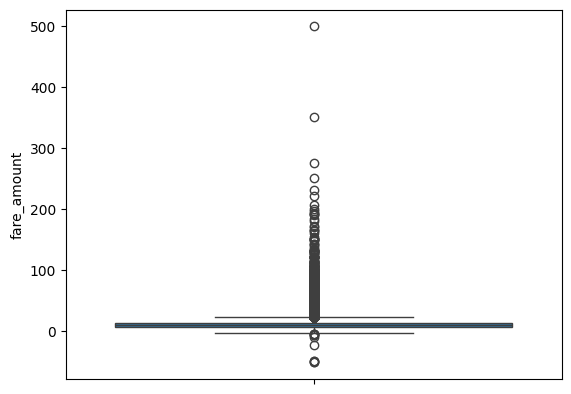

In [27]:
sns.boxplot(df['fare_amount'])
plt.show()

In [28]:
# correlation

In [34]:
df.corr()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week
fare_amount,1.000000,0.122765,0.010458,-0.008482,0.008986,-0.011014,0.010158,-0.021463,0.007508
pickup_datetime,0.122765,1.000000,0.009363,-0.009677,0.008018,-0.010805,0.006398,0.002029,0.004837
pickup_longitude,0.010458,0.009363,1.000000,-0.816461,0.833026,-0.846324,-0.000415,0.002432,0.000825
pickup_latitude,-0.008482,-0.009677,-0.816461,1.000000,-0.774787,0.702367,-0.001559,-0.003821,-0.002454
dropoff_longitude,0.008986,0.008018,0.833026,-0.774787,1.000000,-0.917010,0.000033,0.003478,0.000001
dropoff_latitude,-0.011014,-0.010805,-0.846324,0.702367,-0.917010,1.000000,-0.000659,-0.002544,-0.002335
passenger_count,0.010158,0.006398,-0.000415,-0.001559,0.000033,-0.000659,1.000000,0.013187,0.033189
hour,-0.021463,0.002029,0.002432,-0.003821,0.003478,-0.002544,0.013187,1.000000,-0.086956
day_of_week,0.007508,0.004837,0.000825,-0.002454,0.000001,-0.002335,0.033189,-0.086956,1.000000


<Axes: >

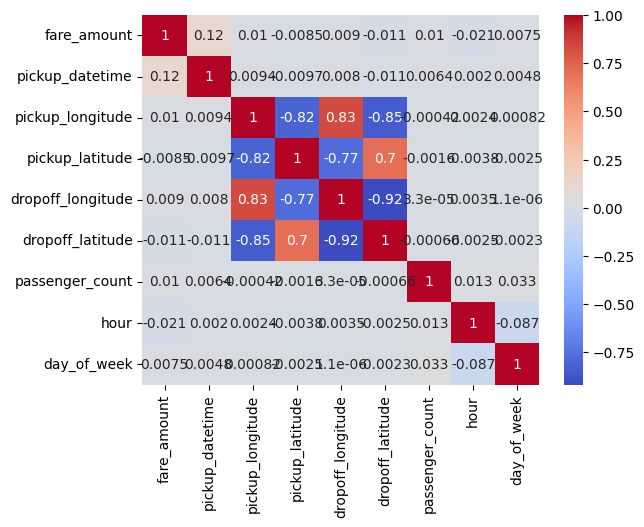

In [36]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [42]:
def haversine(lat1,lon1,lat2,lon2):
    #to radians
    lat1=np.radians(lat1)
    lon1=np.radians(lon1)
    lat2=np.radians(lat2)
    lon2=np.radians(lon2)

    #difference
    dlat = lat2-lat1
    dlon = lon2-lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) *np.sin(dlon/2.0)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r=6371
    return c*r

df['distance'] = df.apply(lambda row: haversine(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']), axis=1)

In [43]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,4.475450


<Axes: >

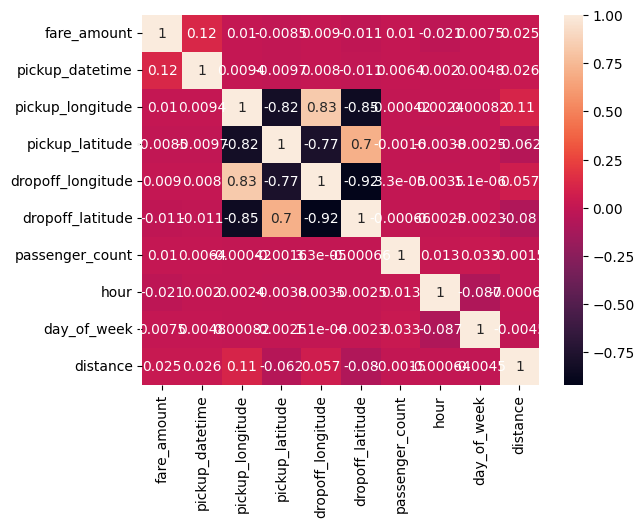

In [44]:
sns.heatmap(df.corr(), annot=True)

In [55]:
x = df[['passenger_count','distance']]
y = df['fare_amount']

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [57]:
md = LinearRegression()

In [58]:
md.fit(x_train,y_train)

LinearRegression()

In [59]:
y_pred = md.predict(x_test)

In [60]:
y_pred

array([11.30081736, 11.30648933, 11.29978693, ..., 11.29995905,
       11.29955437, 11.30125912])

In [61]:
mean_squared_error(y_test,y_pred)

97.85111304211564

In [63]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

In [64]:
mean_squared_error(y_test,y_pred)

34.446972868614324